Box Jenkins

8.6 Box-JenkinsThe procedure to analyze the time series used earlier in this chapter loosely follows the procedure that is commonly called the Box-Jenkins procedure [5]. The procedure is based on the following steps:Plot the data and verify that it is stationary, remove trend, if necessary. If all values are positive, consider using the logarithm of the values.Determine seasonality or periodicity from spectral analysis (Fourier transform, FFT), autocorrelation or other information, for example a-priori knowledge.Difference time series to remove seasonality and make it stationary.Determine the order of the ARMA process from autocorrelation and partial autocorrelation plot of the remaining time series.Determine the coefficients of the model.Check whether the model describes the data adequately. If the fit is unsatisfactory, possibly use more or different fit parameters.Once the model is established we can use it to forecast how the system evolves into the future.

In [3]:
#import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
import sympy as sym
import statsmodels.api
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [4]:
df = pd.read_excel(r'/content/augmento_btc_returns.xlsx')
df.index = df['date']
df

,date,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,2016-11-01 01:00:00,706.00,NaN,0,0,0,1,0,0,0,...,0,1,0,13,0,0,4,1,3,3
2016-11-01 02:00:00,2016-11-01 02:00:00,709.99,-0.005636,1,0,0,1,0,1,0,...,0,0,0,10,0,2,1,1,0,1
2016-11-01 03:00:00,2016-11-01 03:00:00,708.54,0.002044,0,0,0,0,0,0,0,...,0,0,0,8,0,2,1,5,3,0
2016-11-01 04:00:00,2016-11-01 04:00:00,702.85,0.008063,0,0,1,0,0,0,0,...,0,0,0,4,0,1,1,0,0,0
2016-11-01 05:00:00,2016-11-01 05:00:00,708.50,-0.008007,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 11:00:00,2024-04-23 11:00:00,66064.00,0.002464,0,0,0,1,0,0,0,...,0,1,0,28,0,5,15,9,9,0
2024-04-23 12:00:00,2024-04-23 12:00:00,66137.00,-0.001104,0,0,0,0,0,0,0,...,3,1,0,33,0,8,10,5,6,1
2024-04-23 13:00:00,2024-04-23 13:00:00,66544.00,-0.006135,0,1,1,0,0,0,1,...,1,0,0,31,0,8,14,10,5,0


<Axes: title={'center': 'Price'}, xlabel='date'>

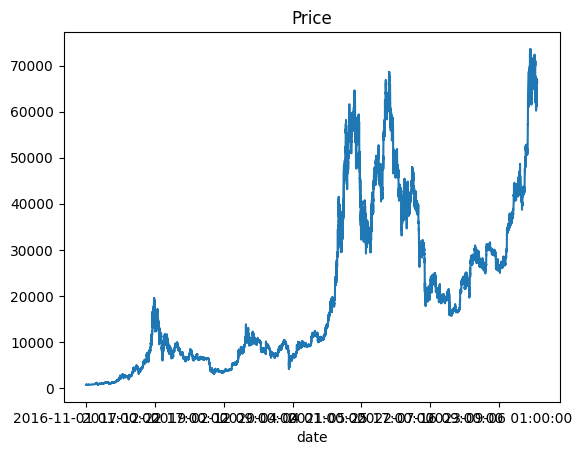

In [5]:
df['listing_close'].plot(title = 'Price')

<Axes: title={'center': 'Returns'}, xlabel='date'>

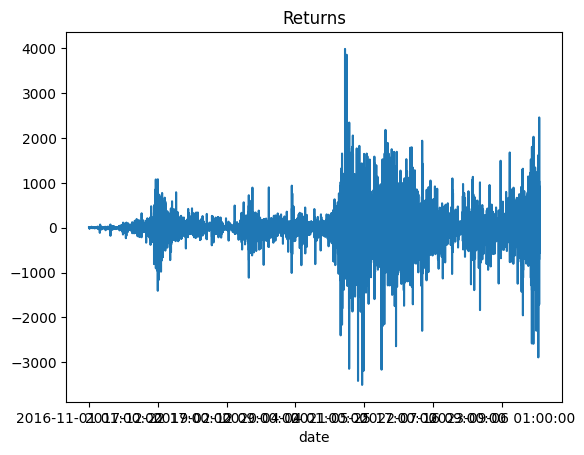

In [6]:
df['returns'] = df['listing_close'] - df['listing_close'].shift(1)
df['returns'].plot(title = 'Returns')

In [7]:
df

,date,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,2016-11-01 01:00:00,706.00,NaN,0,0,0,1,0,0,0,...,0,1,0,13,0,0,4,1,3,3
2016-11-01 02:00:00,2016-11-01 02:00:00,709.99,3.99,1,0,0,1,0,1,0,...,0,0,0,10,0,2,1,1,0,1
2016-11-01 03:00:00,2016-11-01 03:00:00,708.54,-1.45,0,0,0,0,0,0,0,...,0,0,0,8,0,2,1,5,3,0
2016-11-01 04:00:00,2016-11-01 04:00:00,702.85,-5.69,0,0,1,0,0,0,0,...,0,0,0,4,0,1,1,0,0,0
2016-11-01 05:00:00,2016-11-01 05:00:00,708.50,5.65,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 11:00:00,2024-04-23 11:00:00,66064.00,-163.00,0,0,0,1,0,0,0,...,0,1,0,28,0,5,15,9,9,0
2024-04-23 12:00:00,2024-04-23 12:00:00,66137.00,73.00,0,0,0,0,0,0,0,...,3,1,0,33,0,8,10,5,6,1
2024-04-23 13:00:00,2024-04-23 13:00:00,66544.00,407.00,0,1,1,0,0,0,1,...,1,0,0,31,0,8,14,10,5,0


In [8]:
df.describe(include = 'all')

,date,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
count,65535,65480.000000,65474.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,...,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000
unique,65535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-11-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20306.180519,0.997622,0.279423,0.496895,1.386801,1.619928,1.083650,0.834546,0.372915,...,1.385428,0.441001,0.451972,29.191012,0.028305,5.394293,12.342763,5.460533,5.466361,1.493996
std,NaN,17673.331995,197.741039,1.145163,0.841908,1.958483,2.047827,3.496982,1.277662,0.739968,...,3.259289,0.940096,0.901863,24.607571,0.188497,5.225403,10.453966,5.035804,5.047260,1.991603
min,NaN,675.480000,-3502.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,6674.972500,-32.627500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.000000,0.000000,2.000000,6.000000,2.000000,2.000000,0.000000
50%,NaN,11551.055000,0.590000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,23.000000,0.000000,4.000000,10.000000,4.000000,4.000000,1.000000
75%,NaN,30728.242500,35.817500,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,35.000000,0.000000,7.000000,16.000000,7.000000,7.000000,2.000000


In [7]:
print(f'Time period start : {df.date.min()}\nTime period end : {df.date.max()}')

Time period start : 2016-11-01 01:00:00
Time period end : 2024-04-23 15:00:00


In [8]:
df.columns

Index(['date', 'listing_close', 'returns', 'twitter_hacks',
       'twitter_pessimistic_doubtful', 'twitter_banks', 'twitter_selling',
       'twitter_market_manipulation', 'twitter_de_centralisation',
       'twitter_angry',
       ...
       'reddit_dip', 'reddit_launch', 'reddit_fomo_theme',
       'reddit_advice_support', 'reddit_rebranding', 'reddit_wallet',
       'reddit_good_news', 'reddit_problems_and_issues', 'reddit_mining',
       'reddit_waiting'],
      dtype='object', length=256)

In [9]:
df.shape

(65535, 256)

In [10]:
y = df.set_index('date')

In [11]:
y.index

Index(['2016-11-01 01:00:00', '2016-11-01 02:00:00', '2016-11-01 03:00:00',
       '2016-11-01 04:00:00', '2016-11-01 05:00:00', '2016-11-01 06:00:00',
       '2016-11-01 07:00:00', '2016-11-01 08:00:00', '2016-11-01 09:00:00',
       '2016-11-01 10:00:00',
       ...
       '2024-04-23 06:00:00', '2024-04-23 07:00:00', '2024-04-23 08:00:00',
       '2024-04-23 09:00:00', '2024-04-23 10:00:00', '2024-04-23 11:00:00',
       '2024-04-23 12:00:00', '2024-04-23 13:00:00', '2024-04-23 14:00:00',
       '2024-04-23 15:00:00'],
      dtype='object', name='date', length=65535)

In [12]:
y

,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,twitter_etf,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,706.00,NaN,0,0,0,1,0,0,0,0,...,0,1,0,13,0,0,4,1,3,3
2016-11-01 02:00:00,709.99,3.99,1,0,0,1,0,1,0,0,...,0,0,0,10,0,2,1,1,0,1
2016-11-01 03:00:00,708.54,-1.45,0,0,0,0,0,0,0,0,...,0,0,0,8,0,2,1,5,3,0
2016-11-01 04:00:00,702.85,-5.69,0,0,1,0,0,0,0,0,...,0,0,0,4,0,1,1,0,0,0
2016-11-01 05:00:00,708.50,5.65,0,0,0,0,0,0,0,1,...,0,0,0,3,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 11:00:00,66064.00,-163.00,0,0,0,1,0,0,0,1,...,0,1,0,28,0,5,15,9,9,0
2024-04-23 12:00:00,66137.00,73.00,0,0,0,0,0,0,0,1,...,3,1,0,33,0,8,10,5,6,1
2024-04-23 13:00:00,66544.00,407.00,0,1,1,0,0,0,1,2,...,1,0,0,31,0,8,14,10,5,0


In [13]:
# Null values check
y.isnull().sum()

listing_close                   55
returns                         61
twitter_hacks                    0
twitter_pessimistic_doubtful     0
twitter_banks                    0
                                ..
reddit_wallet                    0
reddit_good_news                 0
reddit_problems_and_issues       0
reddit_mining                    0
reddit_waiting                   0
Length: 255, dtype: int64

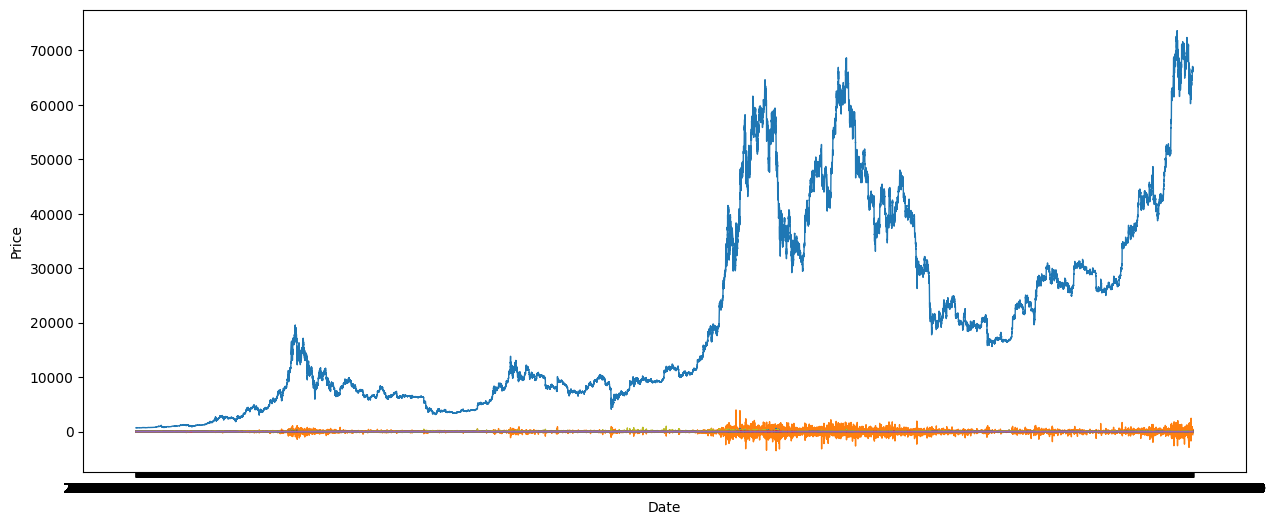

In [14]:
# Time Series plot
plt.figure(figsize = (15,6))
plt.plot(y,linewidth = 1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [15]:
# Import the seaborn library
import seaborn as sns

KeyboardInterrupt: 

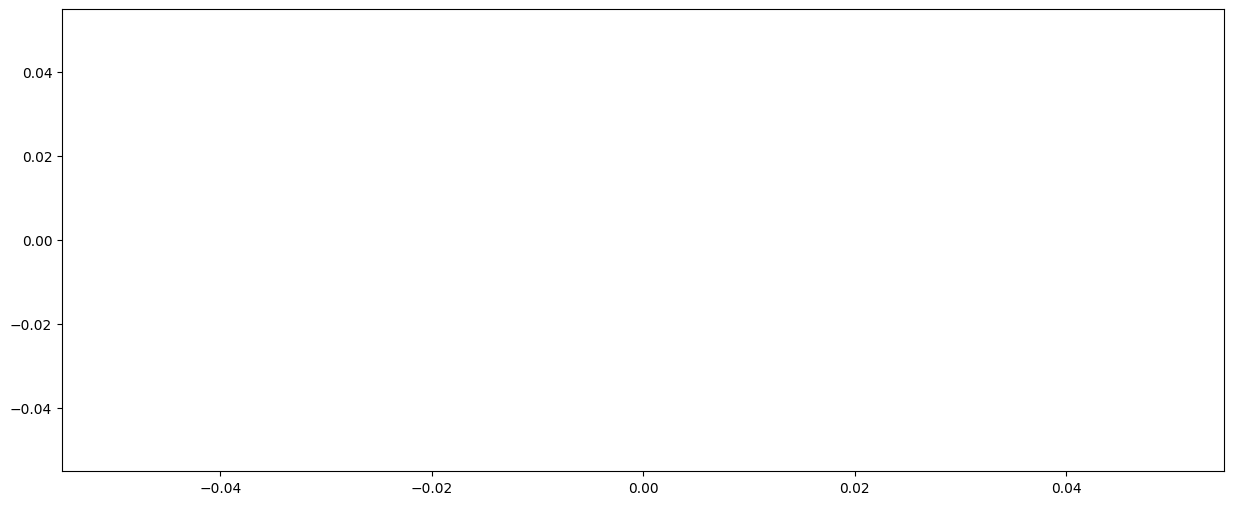

In [17]:
# Density Plot
plt.figure(figsize = (15,6))
sns.histplot(y, kde = True)
plt.xlabel('Returns')
plt.ylabel('BTC')
plt.show()

In [16]:
# Box-plot
plt.figure(figsize = (15,6))
sns.boxplot(x = y.index.date, y = y.returns)
plt.show()

AttributeError: 'Index' object has no attribute 'date'

<Figure size 1500x600 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

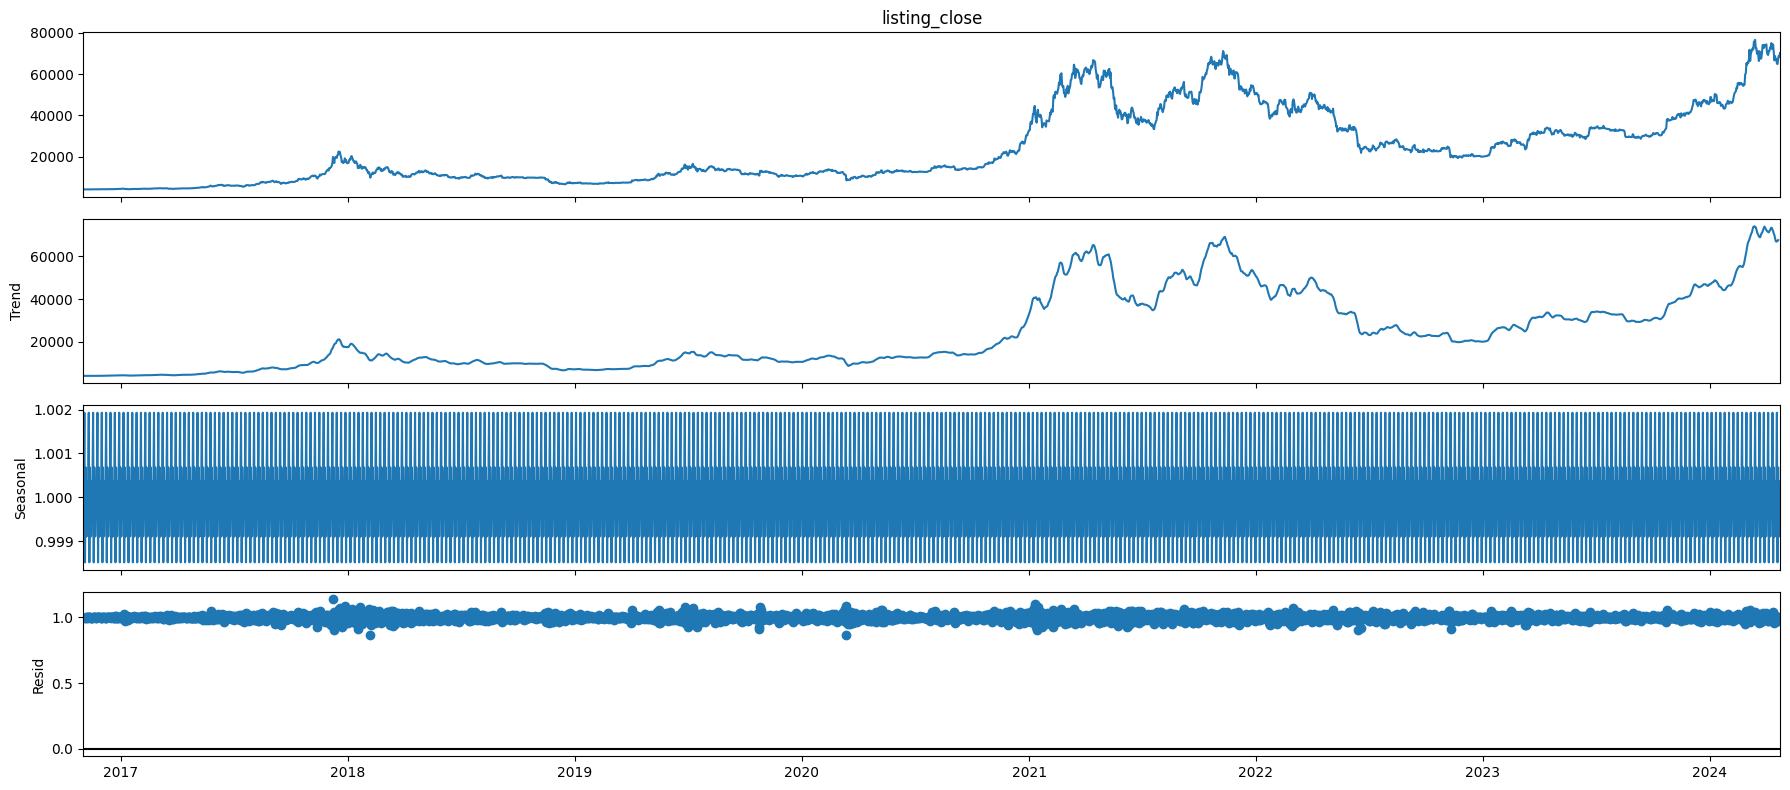

In [27]:
from pylab import rcParams
import statsmodels.api as sm
import pandas as pd

rcParams['figure.figsize'] = 18,8

# Handle missing values (replace with your preferred method)
# Consider using more robust methods if forward fill is insufficient
y_filled = y.fillna(method='ffill')

# Check if there are still any missing values after filling
if y_filled.isnull().values.any():
    print("Warning: There are still missing values in the data.")
    # Drop rows with any missing values
    y_filled = y_filled.dropna()
    # Or consider alternative imputation techniques

# Check for zero or negative values and adjust accordingly
if (y_filled <= 0).any().any():
    print("Warning: Zero or negative values encountered. Shifting data to be positive.")
    y_filled = y_filled + abs(y_filled.min().min()) + 1  # Shift data to be positive

# Set the index to DatetimeIndex if it's not already and infer the frequency
if not isinstance(y_filled.index, pd.DatetimeIndex):
    y_filled.index = pd.to_datetime(y_filled.index)

# Explicitly set frequency if infer_freq fails
# Replace 'D' with the appropriate frequency ('M' for monthly, 'W' for weekly, etc.)
if not y_filled.index.freq:
    y_filled = y_filled.asfreq('D')

# **Check and reset the index if necessary**
if not isinstance(y_filled.index, pd.DatetimeIndex) or y_filled.index.name == 'seasonal':
    # Attempt to infer a datetime index from a suitable column
    date_column = 'Date'  # Replace 'Date' with the actual name of your date column if different
    if date_column in y_filled.columns:
        y_filled = y_filled.set_index(pd.DatetimeIndex(y_filled[date_column]))
        y_filled = y_filled.drop(date_column, axis=1)  # Remove the original date column
    else:
        # If no suitable date column is found, create a default range
        print("Warning: No suitable date column found, using a default range.")
        y_filled.index = pd.date_range(start='2023-01-01', periods=len(y_filled), freq='D')

# Select a single column for decomposition
# Replace 'listing_close' with the actual column you want to decompose
y_filled_single_column = y_filled['listing_close']  # Replace 'listing_close' with the correct column name

# Perform seasonal decomposition, now that the index is a DatetimeIndex with a frequency
decomposition = sm.tsa.seasonal_decompose(y_filled_single_column, model='multiplicative')
plt.figure(figsize=(18, 8))
decomposition.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


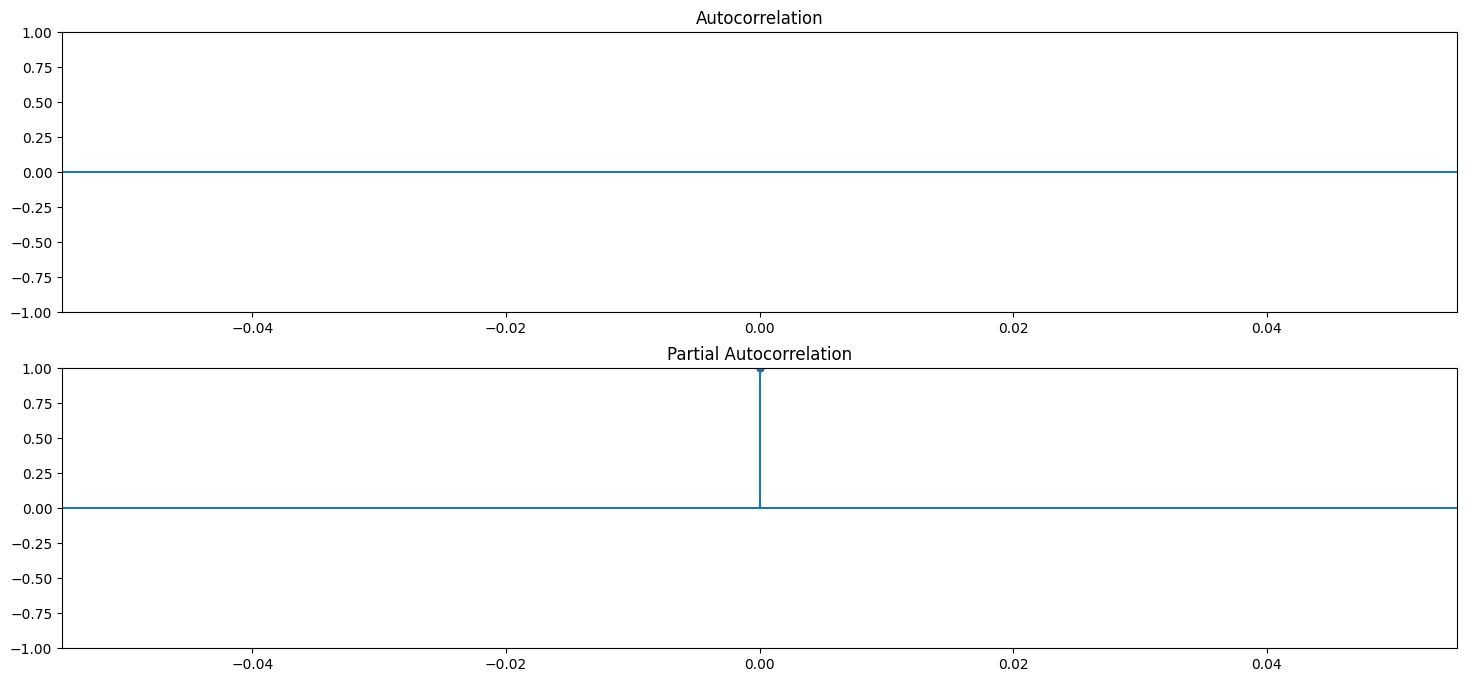

In [30]:
from pylab import rcParams
import statsmodels.api as sm
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Import the necessary functions

# ACF & PACF Plots
plt.figure()
plt.subplot(211)
plot_acf(y['returns'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(y['returns'], ax=plt.gca(), lags = 30)
plt.show()

In [33]:
df = pd.read_excel(r'/content/augmento_btc_returns.xlsx')
df.index = df['date']
df

,date,listing_close,returns,twitter_hacks,twitter_pessimistic_doubtful,twitter_banks,twitter_selling,twitter_market_manipulation,twitter_de_centralisation,twitter_angry,...,reddit_dip,reddit_launch,reddit_fomo_theme,reddit_advice_support,reddit_rebranding,reddit_wallet,reddit_good_news,reddit_problems_and_issues,reddit_mining,reddit_waiting
date,,,,,,,,,,,,,,,,,,,,,
2016-11-01 01:00:00,2016-11-01 01:00:00,706.00,NaN,0,0,0,1,0,0,0,...,0,1,0,13,0,0,4,1,3,3
2016-11-01 02:00:00,2016-11-01 02:00:00,709.99,-0.005636,1,0,0,1,0,1,0,...,0,0,0,10,0,2,1,1,0,1
2016-11-01 03:00:00,2016-11-01 03:00:00,708.54,0.002044,0,0,0,0,0,0,0,...,0,0,0,8,0,2,1,5,3,0
2016-11-01 04:00:00,2016-11-01 04:00:00,702.85,0.008063,0,0,1,0,0,0,0,...,0,0,0,4,0,1,1,0,0,0
2016-11-01 05:00:00,2016-11-01 05:00:00,708.50,-0.008007,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-23 11:00:00,2024-04-23 11:00:00,66064.00,0.002464,0,0,0,1,0,0,0,...,0,1,0,28,0,5,15,9,9,0
2024-04-23 12:00:00,2024-04-23 12:00:00,66137.00,-0.001104,0,0,0,0,0,0,0,...,3,1,0,33,0,8,10,5,6,1
2024-04-23 13:00:00,2024-04-23 13:00:00,66544.00,-0.006135,0,1,1,0,0,0,1,...,1,0,0,31,0,8,14,10,5,0


In [34]:
df = df.dropna(subset=['returns'])

<ipython-input-37-de7c822ce995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = pd.to_numeric(df['returns'], errors='coerce')


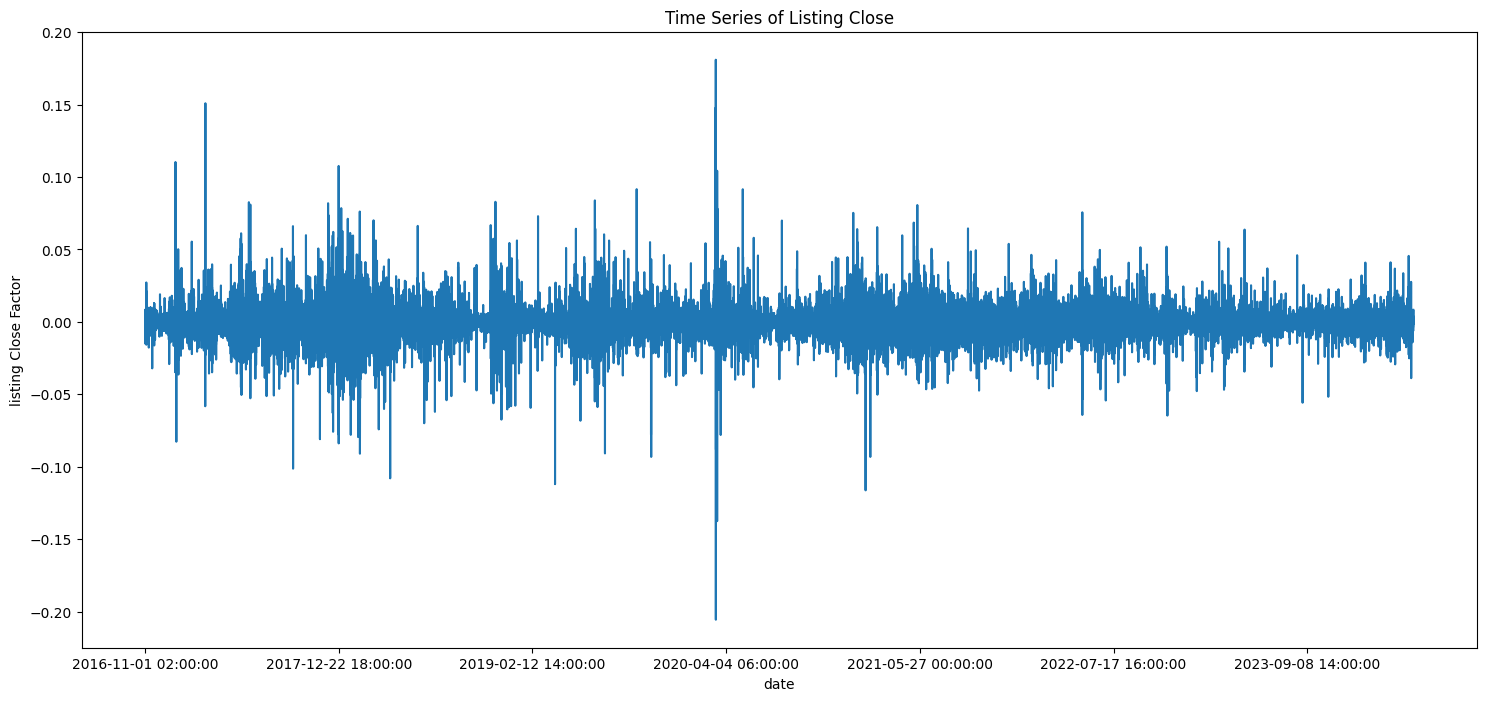

In [37]:
# Convert 'returns' column to numeric, handling errors
df['returns'] = pd.to_numeric(df['returns'], errors='coerce')

# Drop rows with missing values in 'returns' column
df = df.dropna(subset=['returns'])

#Part - 1
#Plotting the time series of value-weighted monthly factor returns for the Ret factor
df['returns'].plot() # Plot the 'listing_close' column directly, since 'date' is the index
plt.xlabel('date')
plt.ylabel('listing Close Factor')
plt.title('Time Series of Listing Close')
plt.show()

In [38]:
#Calculating the annualized mean and standard deviation of this return series
annualized_mean = df['returns'].mean() * 12
annualized_std_dev = df['returns'].std() * math.sqrt(12)
print("Annualized Mean of this return series is: "+str(annualized_mean))
print("Annualized Standard Deviation of this return series is: "+str(annualized_std_dev))

Annualized Mean of this return series is: -0.0008324807772963497
Annualized Standard Deviation of this return series is: 0.028586033228501603


In [39]:
listing_close = df['returns']

In [40]:
print( listing_close )

date
2016-11-01 02:00:00   -0.005636
2016-11-01 03:00:00    0.002044
2016-11-01 04:00:00    0.008063
2016-11-01 05:00:00   -0.008007
2016-11-01 06:00:00   -0.001129
                         ...   
2024-04-23 11:00:00    0.002464
2024-04-23 12:00:00   -0.001104
2024-04-23 13:00:00   -0.006135
2024-04-23 14:00:00   -0.006038
2024-04-23 15:00:00    0.008310
Name: returns, Length: 65474, dtype: float64


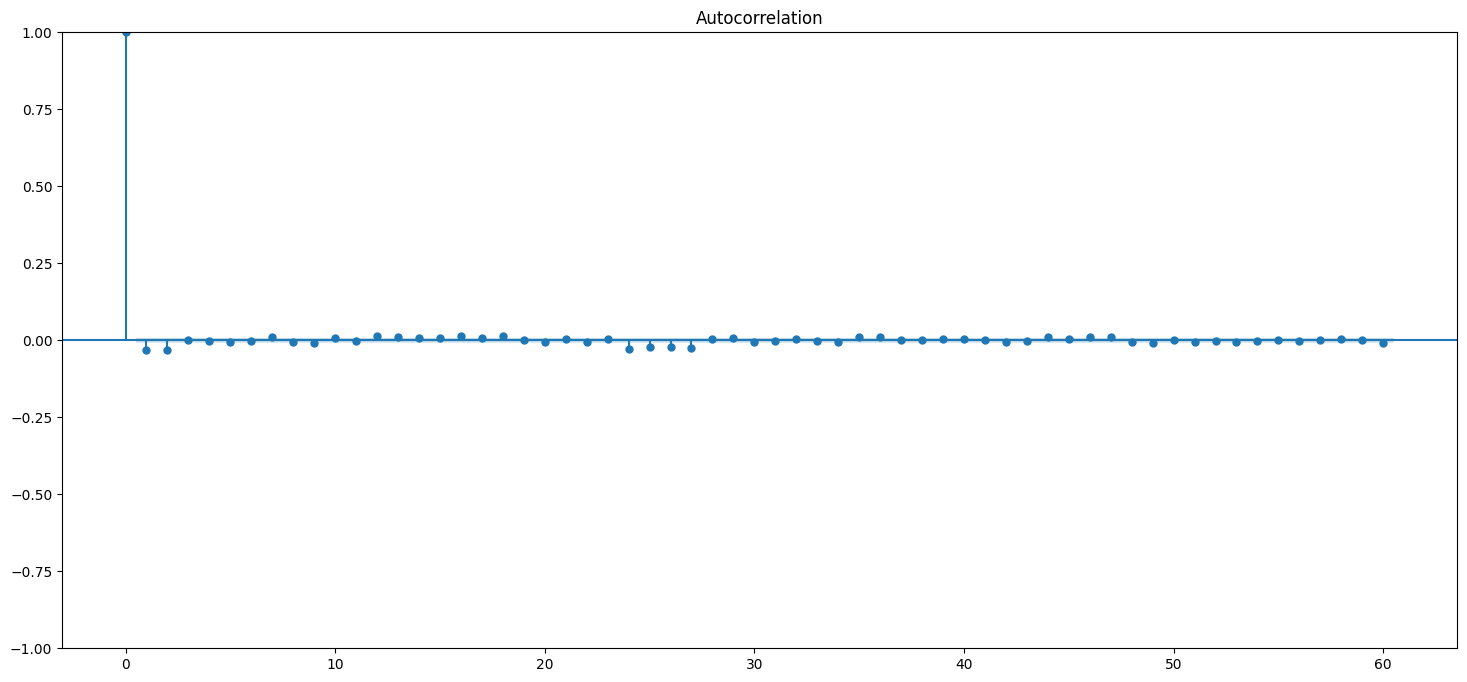

In [41]:
# Plot the Autocorrelation Function (ACF) with 60 lags
plot_acf(listing_close, lags=60)

# Show the plot
plt.show()

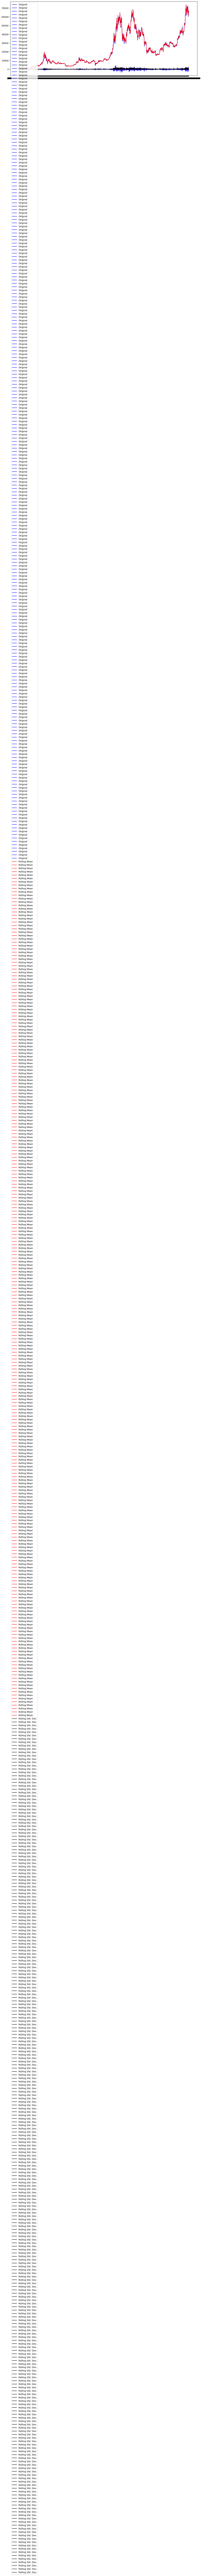

In [43]:
# Rolling Mean & Rolling Standard Deviation
rolmean = y.rolling(window = 12).mean()
rolstd = y.rolling(window = 12).std()

plt.figure(figsize = (15,6))
orig = plt.plot(y, color = 'blue', label ='Original')
mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# Augmented Dicky-Fuller Test
print('-------------Results of Dicky Fuller Test -------------')
dftest = adfuller(y['passengers'], autolag = 'AIC')
dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value : MacKinnon\'s approximate p-value',
                                                 'No. of Lags used', 'No. of observations used'])
for key,value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value
dfoutput['Maximized AIC:'] = dftest[5]
print(dfoutput)

In [ ]:
#Part - 3

# Assuming 'listing_close' is your time series data
# Handle missing or infinite values
returns_clean = returns.replace([np.inf, -np.inf], np.nan).dropna()

sm.stats.acorr_ljungbox(returns_clean, lags=[6], return_df=True)